In [1]:
#Setting seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

## Importing dependencies

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import os

from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout, Conv2D, BatchNormalization,MaxPooling2D,BatchNormalization, GlobalMaxPooling2D
from keras.models import Model
from keras.regularizers import l2
from tensorflow.keras import backend

Dataset link: https://www.kaggle.com/datasets/brsdincer/mars-surface-and-curiosity-image-set-nasa

In [3]:
print("Class 0:", len(os.listdir(r'C:\Users\sejbp\Coding\GITHUB\Mars-Rover-Image-Classification\Mars Surface and Curiosity Image dataset\main_dataset\0')))
print("Class 1:", len(os.listdir(r'C:\Users\sejbp\Coding\GITHUB\Mars-Rover-Image-Classification\Mars Surface and Curiosity Image dataset\main_dataset\1')))
print("Class 2:", len(os.listdir(r'C:\Users\sejbp\Coding\GITHUB\Mars-Rover-Image-Classification\Mars Surface and Curiosity Image dataset\main_dataset\2')))
print("Class 3:", len(os.listdir(r'C:\Users\sejbp\Coding\GITHUB\Mars-Rover-Image-Classification\Mars Surface and Curiosity Image dataset\main_dataset\3')))
print("Class 4:", len(os.listdir(r'C:\Users\sejbp\Coding\GITHUB\Mars-Rover-Image-Classification\Mars Surface and Curiosity Image dataset\main_dataset\4')))
print("Class 5:", len(os.listdir(r'C:\Users\sejbp\Coding\GITHUB\Mars-Rover-Image-Classification\Mars Surface and Curiosity Image dataset\main_dataset\5')))
print("Class 6:", len(os.listdir(r'C:\Users\sejbp\Coding\GITHUB\Mars-Rover-Image-Classification\Mars Surface and Curiosity Image dataset\main_dataset\6')))
print("Class 7:", len(os.listdir(r'C:\Users\sejbp\Coding\GITHUB\Mars-Rover-Image-Classification\Mars Surface and Curiosity Image dataset\main_dataset\7')))
print("Class 8:", len(os.listdir(r'C:\Users\sejbp\Coding\GITHUB\Mars-Rover-Image-Classification\Mars Surface and Curiosity Image dataset\main_dataset\8')))
print("Class 9:", len(os.listdir(r'C:\Users\sejbp\Coding\GITHUB\Mars-Rover-Image-Classification\Mars Surface and Curiosity Image dataset\main_dataset\9')))
print("Class 10:", len(os.listdir(r'C:\Users\sejbp\Coding\GITHUB\Mars-Rover-Image-Classification\Mars Surface and Curiosity Image dataset\main_dataset\10')))
print("Class 11:", len(os.listdir(r'C:\Users\sejbp\Coding\GITHUB\Mars-Rover-Image-Classification\Mars Surface and Curiosity Image dataset\main_dataset\11')))
print("Class 12:", len(os.listdir(r'C:\Users\sejbp\Coding\GITHUB\Mars-Rover-Image-Classification\Mars Surface and Curiosity Image dataset\main_dataset\12')))
print("Class 13:", len(os.listdir(r'C:\Users\sejbp\Coding\GITHUB\Mars-Rover-Image-Classification\Mars Surface and Curiosity Image dataset\main_dataset\13')))
print("Class 14:", len(os.listdir(r'C:\Users\sejbp\Coding\GITHUB\Mars-Rover-Image-Classification\Mars Surface and Curiosity Image dataset\main_dataset\14')))
print("Class 15:", len(os.listdir(r'C:\Users\sejbp\Coding\GITHUB\Mars-Rover-Image-Classification\Mars Surface and Curiosity Image dataset\main_dataset\15')))
print("Class 16:", len(os.listdir(r'C:\Users\sejbp\Coding\GITHUB\Mars-Rover-Image-Classification\Mars Surface and Curiosity Image dataset\main_dataset\16')))
print("Class 17:", len(os.listdir(r'C:\Users\sejbp\Coding\GITHUB\Mars-Rover-Image-Classification\Mars Surface and Curiosity Image dataset\main_dataset\17')))
print("Class 18:", len(os.listdir(r'C:\Users\sejbp\Coding\GITHUB\Mars-Rover-Image-Classification\Mars Surface and Curiosity Image dataset\main_dataset\18')))
print("Class 19:", len(os.listdir(r'C:\Users\sejbp\Coding\GITHUB\Mars-Rover-Image-Classification\Mars Surface and Curiosity Image dataset\main_dataset\19')))
print("Class 20:", len(os.listdir(r'C:\Users\sejbp\Coding\GITHUB\Mars-Rover-Image-Classification\Mars Surface and Curiosity Image dataset\main_dataset\20')))
print("Class 21:", len(os.listdir(r'C:\Users\sejbp\Coding\GITHUB\Mars-Rover-Image-Classification\Mars Surface and Curiosity Image dataset\main_dataset\21')))
print("Class 22:", len(os.listdir(r'C:\Users\sejbp\Coding\GITHUB\Mars-Rover-Image-Classification\Mars Surface and Curiosity Image dataset\main_dataset\22')))
print("Class 23:", len(os.listdir(r'C:\Users\sejbp\Coding\GITHUB\Mars-Rover-Image-Classification\Mars Surface and Curiosity Image dataset\main_dataset\23')))


Class 0: 80
Class 1: 24
Class 2: 36
Class 3: 176
Class 4: 59
Class 5: 506
Class 6: 66
Class 7: 162
Class 8: 515
Class 9: 371
Class 10: 277
Class 11: 26
Class 12: 117
Class 13: 68
Class 14: 153
Class 15: 111
Class 16: 86
Class 17: 137
Class 18: 22
Class 19: 68
Class 20: 71
Class 21: 200
Class 22: 193
Class 23: 498


In [4]:
IMG_HEIGHT = 180
IMG_WIDTH = 180
batch_size = 32

## Train-Test split

In [5]:
# Function to load and preprocess images
def preprocess_image(image_path, target_size = (180,180)):
    image = Image.open(image_path)
    image = image.convert("RGB")
    image = image.resize(target_size)
    image_array = np.array(image) / 255.0
    return image_array

dataset_dir = r'C:\Users\sejbp\Coding\GITHUB\Mars-Rover-Image-Classification\Mars Surface and Curiosity Image dataset\main_dataset'
image_paths = []
labels = []

# Iterate over each class directory
for class_name in os.listdir(dataset_dir):
    class_dir = os.path.join(dataset_dir, class_name)
    if os.path.isdir(class_dir):
        # Iterate over images in the class directory
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            image_paths.append(image_path)
            labels.append(int(class_name))

In [6]:
x_train_paths, x_test_paths, y_train, y_test = train_test_split(image_paths, labels, test_size = 0.2, random_state = 42)

In [7]:
# Load and preprocess images for training set
x_train = [preprocess_image(image_path) for image_path in x_train_paths]

# Load and preprocess images for testing set
x_test = [preprocess_image(image_path) for image_path in x_test_paths]

# Convert lists to numpy arrays
x_train = np.array(x_train)
x_test = np.array(x_test)

# Convert labels to numpy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

In [8]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (3217, 180, 180, 3)
y_train shape: (3217,)
x_test shape: (805, 180, 180, 3)
y_test shape: (805,)


## Model Architecture

In [9]:
Early_Stopper = tf.keras.callbacks.EarlyStopping(monitor = "loss", patience = 3, mode = "min")
Checkpoint_Model = tf.keras.callbacks.ModelCheckpoint(monitor = "val_accuracy", save_best_only = True, save_weights_only = True,
                                                      filepath = "./modelcheck")
Reduce_Model = tf.keras.callbacks.ReduceLROnPlateau(monitor = "accuracy", factor = 0.1, patience = 7)

In [10]:
Input_Layer = tf.keras.Input(shape = (180, 180, 3))

x = Conv2D(32, (3, 3), activation = "relu", padding = "same")(Input_Layer)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64,(3, 3), activation = "relu", padding = "same")(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (2, 2), activation = "relu", padding = "same")(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(256, (2, 2), activation = "relu", padding = "same")(x)
x = GlobalMaxPooling2D()(x)

x = Dense(256, activation = "relu", kernel_regularizer = l2(0.001))(x)
x = Dropout(0.5)(x)

class_prediction_layer = Dense(24, activation = "softmax", name = "CLASS_PREDICTION")(x)

In [11]:
model = Model(Input_Layer, class_prediction_layer)

In [12]:
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 180, 180, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 64)        0     

## Handling imbalances

In [13]:
# Compute class weights
class_weights = compute_class_weight('balanced', classes = np.unique(y_train), y = y_train)
class_weights_dict = dict(enumerate(class_weights))

In [14]:
# Define focal loss function
def focal_loss(gamma = 2., alpha = class_weights):
    def focal_loss_fixed(y_true, y_pred):
        y_true = tf.cast(y_true, tf.float32)  # Cast y_true to float32
        pt = y_pred * y_true + (1 - y_pred) * (1 - y_true)
        pt = tf.clip_by_value(pt, tf.keras.backend.epsilon(), 1 - tf.keras.backend.epsilon())
        return -tf.reduce_sum(alpha * tf.pow(1. - pt, gamma) * tf.math.log(pt), axis = -1)
    return focal_loss_fixed

In [15]:
y_train_encoded = to_categorical(y_train, num_classes = 24)
y_test_encoded = to_categorical(y_test, num_classes = 24)

## Training

In [16]:
model.compile(optimizer = "adam", loss = focal_loss(), metrics = ["accuracy", tf.keras.metrics.Precision(), 
                                                                  tf.keras.metrics.Recall()])

In [17]:
history = model.fit(x_train, y_train_encoded, epochs = 30, batch_size = 32, 
                    validation_data = (x_test, y_test_encoded), 
                    callbacks = [Early_Stopper, Checkpoint_Model, Reduce_Model],
                    class_weight=class_weights_dict)

Epoch 1/30


101/101 [==============================] - 44s 408ms/step - loss: 6.2235 - accuracy: 0.0115 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 3.2321 - val_accuracy: 0.0075 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 0.0010
Epoch 2/30
101/101 [==============================] - 41s 402ms/step - loss: 5.1191 - accuracy: 0.0227 - precision: 0.1724 - recall: 0.0016 - val_loss: 3.2182 - val_accuracy: 0.0037 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 0.0010
Epoch 3/30
101/101 [==============================] - 41s 404ms/step - loss: 4.1823 - accuracy: 0.0466 - precision: 0.2405 - recall: 0.0059 - val_loss: 3.2412 - val_accuracy: 0.0050 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 0.0010
Epoch 4/30
101/101 [==============================] - 41s 407ms/step - loss: 3.2320 - accuracy: 0.1296 - precision: 0.3283 - recall: 0.0202 - val_loss: 2.5699 - val_accuracy: 0.1143 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 0.001

In [18]:
model.save('final_model.h5')

c:\Users\sejbp\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Evaluation

In [24]:
# Evaluate the model on the test data
loss, accuracy, precision, recall = model.evaluate(x_test, y_test_encoded)

# Print the evaluation results
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy * 100:.2f} %')
print(f'Test Precision: {precision * 100:.2f} %')
print(f'Test Recall: {recall * 100:.2f} %')

26/26 [==============================] - 2s 94ms/step - loss: 0.4329 - accuracy: 0.9006 - precision: 0.9530 - recall: 0.8571
Test Loss: 0.4329
Test Accuracy: 90.06 %
Test Precision: 95.30 %
Test Recall: 85.71 %


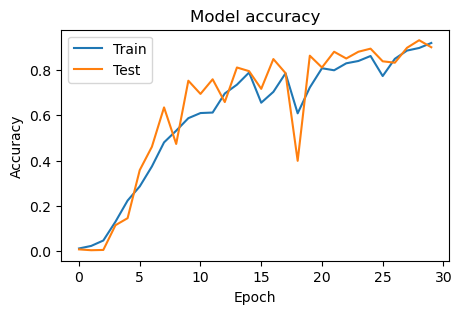

In [26]:
# Plot training & validation accuracy values
plt.figure(figsize = (5, 3))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc = 'upper left')
plt.show()

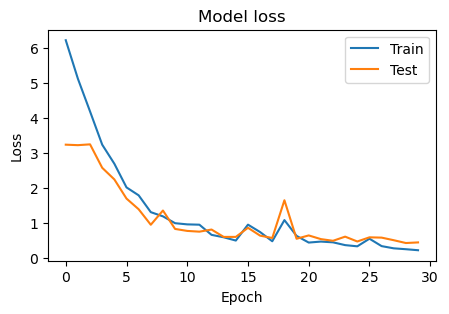

In [31]:
# Plot training & validation loss values
plt.figure(figsize = (5, 3))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc = 'upper right')
plt.show()

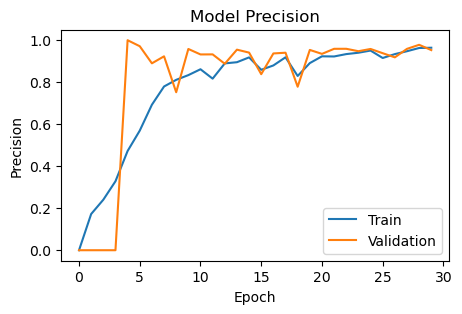

In [30]:
# Plot training & validation precision values
plt.figure(figsize = (5, 3))
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('Model Precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'lower right')
plt.show()

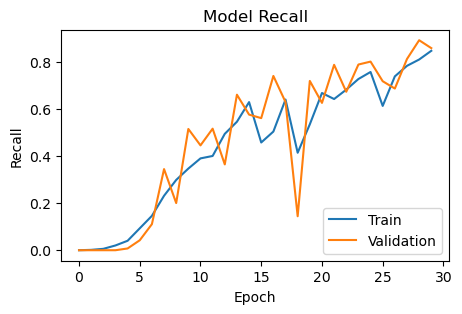

In [32]:
# Plot training & validation precision values
plt.figure(figsize = (5, 3))
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'lower right')
plt.show()

## Predictions

In [40]:
# Load label information from the text file
label_info_file = r'C:\Users\sejbp\Coding\GITHUB\Mars-Rover-Image-Classification\Mars Surface and Curiosity Image dataset\main_dataset\Labels Information.txt'

# Create a dictionary to map class indices to label names
class_indices = {}
with open(label_info_file, 'r') as file:
    for index, line in enumerate(file):
        label = line.strip()
        class_indices[index] = label

In [41]:
# Load the model
model_path = r'C:\Users\sejbp\Coding\GITHUB\Mars-Rover-Image-Classification\Model_training_dataset_split\final_model.h5'
model = tf.keras.models.load_model(model_path, compile = False)

In [42]:
# Function to preprocess the image
def preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.resize((180, 180))
    image_array = np.array(image)
    image_array = np.expand_dims(image_array, axis=0)
    image_array = image_array.astype('float32') / 255.0
    return image_array

# Function to predict the class of an image
def predict_image_class(model, image_array, class_indices):
    predictions = model.predict(image_array)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name.split(' ', 1)[1].strip()

1/1 [==============================] - 0s 31ms/step
Predicted Class Name :  Rover Rear Deck


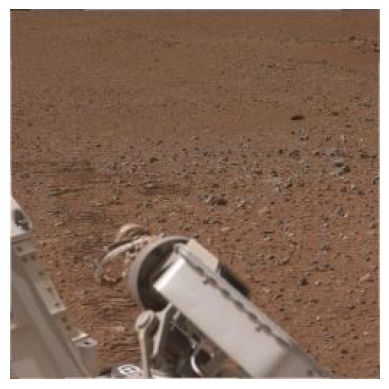

In [47]:
image_path = r'C:\Users\sejbp\Coding\GITHUB\Mars-Rover-Image-Classification\Mars Surface and Curiosity Image dataset\main_dataset\20\0025ML0001270110100818E01_DRCL.JPG'
preprocessed_image = preprocess_image(image_path)
predicted_class_name = predict_image_class(model, preprocessed_image, class_indices)
print("Predicted Class Name : ", predicted_class_name)

image = Image.open(image_path)
plt.axis('off')
plt.imshow(image);
